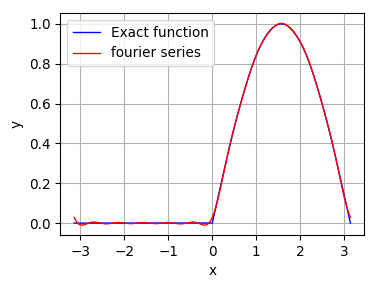

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
f=np.zeros(100000)
x=np.linspace(0,np.pi,50000)
k=np.linspace(-np.pi,np.pi,100000)
x=np.sin(x)
f[50000:]=x
    
def fc(x,n):
    return np.cos(n*x)*np.sin(x)*((np.sign(x)+1)/2)

def fs(x,n):
    return np.sin(n*x)*np.sin(x)*((np.sign(x)+1)/2)

def fourier_coef1(d,ei,ef,n): #
    coefc=np.zeros(n+1)
    coefs=np.zeros(n+1)
    for i in range(n+1):
        coefc[i]=integrate.quad(fc,-np.pi,np.pi, args=(i,))[0]/np.pi
        coefs[i]=integrate.quad(fs,-np.pi,np.pi, args=(i,))[0]/np.pi
    return coefc,coefs

b,a=fourier_coef1(f,-np.pi,np.pi,11)
s=0
for j in range(11):
    if j==0:
        s=s-0.5*b[j]#*np.cos(j*k)
    s=s+a[j]*np.sin(j*k)+b[j]*np.cos(j*k)
    
plt.figure(figsize=(4,3),dpi=98)
plt.plot(k,f,"b",label='Exact function',linewidth=1)
plt.plot(k,s,"r",label='fourier series',linewidth=1)
plt.grid(True)
plt.legend()
plt.tick_params(labelsize=10)
plt.xlabel('x',fontsize=10)
plt.ylabel('y',fontsize=10)
plt.show()



Scipy code consume 0.00761330000000271 s
My code consume 0.001678699999985156 s


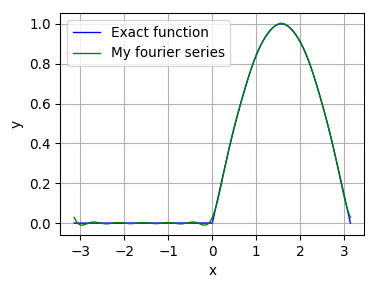

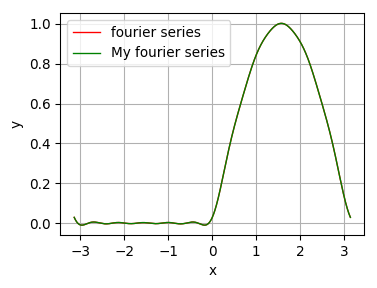

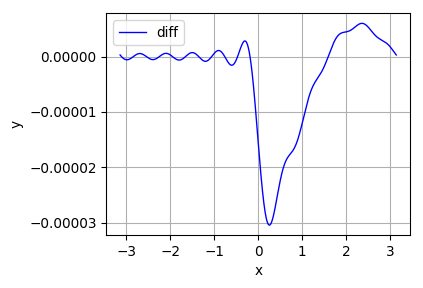

In [8]:
import timeit
def fourier_coef(d,ei,ef,n): #
    y=np.linspace(ei,ef,d.shape[0])
    coefc=np.zeros(n+1)
    coefs=np.zeros(n+1)
    for i in range(n+1):
        coefc[i]=g(d*np.cos(i*y),ei,ef)/np.pi
        coefs[i]=g(d*np.sin(i*y),ei,ef)/np.pi
    return coefc,coefs

def g(d,ei,ef):
    """
    integration is written by myself with the Simpson's rule and 3/8 Simpson's rule. Unlike Scipy's, this code can directly deal
with array with initial point and final point.
    """
    # d: the array before integrated
    # ei: start point
    # ef: ending point
    N=d.shape[0]-1
    h=(ef-ei)/N
    return ig(d,N+1,h)

def ig(d,N,h): 
    #using the Simpson's rule
    """
    The integration is written by myself with the Simpson's rule and 3/8 Simpson's rule. Unlike Scipy's, this code can directly deal
with array with initial point and final point.
    """
    if N == 1:
        return 0
    elif N==0:
        return 0
    elif N == 2:
        return (d[0]+d[1])*h/2
    elif N == 3:
        return (d[0]+4*d[1]+d[2])*h/3
    elif N == 4:
        return (d[0]+3*d[1]+3*d[2]+d[3])*3*h/8
    elif (N+1)%2 == 0:
        return ((d[N-1]+d[0]+sum(d[1::2])*4+sum(d[2:N-1:2])*2))*h/3
    elif (N+1)%2 == 1:
        return (sum(d[1:N-3:2])*4+sum(d[2:N-5:2])*2+d[0]+d[N-4])*h/3+ig(d[-4:],4,h)

begin_time1=timeit.timeit()
b,a=fourier_coef1(f,-np.pi,np.pi,11)
s=0
for j in range(11):
    if j==0:
        s=s-0.5*b[j]#*np.cos(j*k)
    s=s+a[j]*np.sin(j*k)+b[j]*np.cos(j*k)
end_time1=timeit.timeit()
print('Scipy code consume',begin_time1-end_time1,'s')

begin_time2=timeit.timeit()
b1,a1=fourier_coef(f,-np.pi,np.pi,11)
s1=0  
for r in range(11):
    if r==0:
        s1=s1-0.5*b1[r]#*np.cos(j*k)
    s1=s1+a1[r]*np.sin(r*k)+b1[r]*np.cos(r*k)
end_time2=timeit.timeit()
print('My code consume',begin_time2-end_time2,'s')

plt.figure(figsize=(4,3),dpi=98)
plt.plot(k,f,"b",label='Exact function',linewidth=1)
plt.plot(k,s1,"g",label='My fourier series',linewidth=1)
plt.grid(True)
plt.legend()
plt.tick_params(labelsize=10)
plt.xlabel('x',fontsize=10)
plt.ylabel('y',fontsize=10)
plt.show()

plt.figure(figsize=(4,3),dpi=98)
plt.plot(k,s,"r",label='fourier series',linewidth=1)
plt.plot(k,s1,"g",label='My fourier series',linewidth=1)
plt.grid(True)
plt.legend()
plt.tick_params(labelsize=10)
plt.xlabel('x',fontsize=10)
plt.ylabel('y',fontsize=10)
plt.show()

plt.figure(figsize=(4,3),dpi=98)
#plt.plot(k,s,"r",label='Exact function',linewidth=1)
plt.plot(k,s1-s,"b",label='diff',linewidth=1)
plt.grid(True)
plt.legend()
plt.tick_params(labelsize=10)
plt.xlabel('x',fontsize=10)
plt.ylabel('y',fontsize=10)
plt.show()

In [6]:
from scipy import integrate
x2 = lambda x: x**2
integrate.quad(x2, 0, 4)[0]


21.333333333333336

In [7]:
x=np.linspace(0,4,10000)
x=x**2
g(x,0,4)

21.333333333333357

In [8]:
21.333333333333336-21.333333333333357

-2.1316282072803006e-14

In [9]:
64.0/3.0-21.333333333333357

-2.4868995751603507e-14

In [11]:
64.0/3.0-21.333333333333336

-3.552713678800501e-15

In [10]:
(0.002212)**(0.5)/np.sqrt(226)

0.003128515721467454